<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> Diplomado de Análisis de datos y Machine Learning en Python</h1>


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

<p><a name="contents"></a></p>

# Contenido Sesión 4

- <a href="#misdat">1. Procesamiento de datos nulos II</a><br>
 - <a href="#ignorarFila">1.1  Ignorar fila de datos</a><br>
 - <a href="#valVec">1.2 Llenado con valores vecinos</a><br>
 - <a href="#valSKL">1.3 Llenado de datos usando sklearn</a><br>
 - <a href="#valMod">1.4 Llenado con modelado</a><br>
- <a href="#example"> Ejemplo de preprocesado de datos</a><br>
- <a href="#catvar">2. Manipulación de variables categóricas</a><br>
 - <a href="#opevec">2.1. Operaciones vectorizadas con `strings`</a><br>
 - <a href="#varord">2.2. Variables ordinales: Codificación de enteros</a><br>
 - <a href="#varnom">2.3. Variables nominales: Condificación one-hot (dummy variables)</a><br>
- <a href="#groupby">3. Groupby </a><br>
 - <a href="#trafil">3.1. Funciones ` transform`  y ` filter` </a><br>
 - <a href="#cladiv">3.2. Especificando la clave para la división del DataFrame  </a><br>
 - <a href="#tabdin">3.3. Tablas dinámicas  </a><br>




<p><a name="misdat"></a></p>

# 1. Procesamiento de datos nulos II

[[Contenidos]](#contents)

El dataset adult.csv fue extraído por Barry Becke de la base de datos de Censos de  1994. Contiene tanto variables numéricas como categóricas. La información de las variables y su contenido se presentan a continuación:

age: continuo \\
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. \\
fnlwgt: continuo. \\
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. \\
education-num: continuo. \\
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. \\
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. \\
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. \\
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. \\
sex: Female, Male. \\
capital-gain: continuo. \\
capital-loss: continuo. \\
hours-per-week: continuo. \\
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 

In [ ]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K
48841,1,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,United-States,>50K


Encontrar el número de valores faltantes por columna

In [ ]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capitalgain          0
capitalloss          0
hoursperweek         0
native-country     857
class                0
dtype: int64

In [ ]:
# Porcentaje de información faltante
(df.isnull().sum()/len(df))*100

age               0.000000
workclass         5.730724
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.751198
relationship      0.000000
race              0.000000
sex               0.000000
capitalgain       0.000000
capitalloss       0.000000
hoursperweek      0.000000
native-country    1.754637
class             0.000000
dtype: float64

Podemos decir que hay cinco metodologías principales para hacer el tratamiento de los datos nulos:
  
1.  Reemplazar con un valor constante
2. Reemplazar con un valor estadístico  (promedio, media, moda )
3. Ignorar la fila de datos
4.  Hacer un llenado hacia atrás (back-fill) o hacia adelante (forward-fill)
5. Llenado basado en modelos

Los dos primeros ya los cubrimos en la sesión anterior, así que enfoquemonos en los restantes.



<p><a name="ignorarFila"></a></p>

## 1.1 Ignorar fila de datos

El comando `dropna()` permite eliminar las filas y/o columnas en las que hayan datos faltantes

In [ ]:
df_filtered=df.dropna()

In [ ]:
print('Número de filas iniciales', len(df))
print('Número de filas después de filtrar', len(df_filtered))
print('Porcentaje de filas eliminadas',(1-len(df_filtered)/len(df))*100)

Número de filas iniciales 48842
Número de filas después de filtrar 45222
Porcentaje de filas eliminadas 7.411653904426519


In [ ]:
df_filtered.iloc[10:20,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
10,2,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,4,United-States,>50K
11,1,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,2,India,>50K
12,0,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,1,United-States,<=50K
13,1,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,3,United-States,<=50K
15,1,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,2,Mexico,<=50K
16,0,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,1,United-States,<=50K
17,1,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,2,United-States,<=50K
18,2,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,3,United-States,<=50K
19,2,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,2,United-States,>50K
20,2,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,>50K


Note que los índices no cambian. Lo que realiza es la eliminación de la fila (por ejemplo la 14 no está), pero mantiene la indexación. Por tanto, estos no coinciden con el número total de filas. Para reasignar los índices se puede hacer uso del comando `reset_index()`  

In [ ]:
df_filtered.reset_index(drop=True,inplace=True)

In [ ]:
help(df_filtered.reset_index)

In [ ]:
df_filtered.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States,<=50K
6,3,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,0,Jamaica,<=50K
7,3,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,2,United-States,>50K
8,1,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,4,0,3,United-States,>50K
9,2,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,2,0,2,United-States,>50K


Se puede usar el argumento `subset` para seleccionar solo las columnas sobre las que se desea analizar si hay valores nulos para eliminar las filas 

In [ ]:
help(df.dropna)

In [ ]:
df.dropna(subset=['native-country']).head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States,<=50K
6,3,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,0,Jamaica,<=50K
7,3,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,2,United-States,>50K
8,1,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,4,0,3,United-States,>50K
9,2,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,2,0,2,United-States,>50K


In [ ]:
df.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K
5,2,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,2,United-States,<=50K
6,3,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,0,Jamaica,<=50K
7,3,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,2,United-States,>50K
8,1,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,4,0,3,United-States,>50K
9,2,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,2,0,2,United-States,>50K


<p><a name="valVec"></a></p>

## 1.2 Llenado con valores vecinos

El comando `fillna()` tiene el argumento `method` que permite hacer un llenado hacia atrás ('bfill') o hacia adelante ('ffill').

Tenga en cuenta que al usar ésta opción si el dato con el que se intenta hacer el llenado también es un NaN, éste permanece.

In [ ]:
df.iloc[25:30,:]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
df.iloc[25:30,:].fillna(method='bfill')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,Private,180211,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
df.iloc[25:30,:].fillna(method='ffill')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
25,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
26,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
27,3,Private,180211,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
28,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
29,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
x=df.iloc[25:30:]
nombre_columnas= df.columns

<p><a name="valSKL"></a></p>

## 1.3 Llenado de datos usando sklearn



Es posible también usar el metodo 'SimpleImputer' de la libreria sklearn para hacer llenado, éste nos permite definir cual estrategia usar para el llenado de los datos (media, mediana o moda).

In [ ]:
%pip install sklearn
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')
X = df.iloc[25:30,:]
trans = pd.DataFrame(imp.fit_transform(X), columns=nombre_columnas)
trans



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
1,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
2,3,Private,180211,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
3,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
4,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
pd.DataFrame(imp.fit_transform(X), columns=df.columns)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,4,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,2,United-States,>50K
1,0,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,2,United-States,<=50K
2,3,Private,180211,Some-college,10,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,3,South,>50K
3,2,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,4,United-States,<=50K
4,3,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,<=50K


In [ ]:
type(imp.fit_transform(X))

numpy.ndarray

In [ ]:
help(imp = SimpleImputer)

<p><a name="valMod"></a></p>

## 1.4 Llenado con modelado 

Una forma muy eficiente, pero más compleja de llenado de datos es convertir la columna a la que deseamos llenarle los datos faltantes y modelarla en función de las columnas sin datos faltantes.

Dependiendo de la clase de dato podemos usar regresiones o clasificaciones. No profundizaremos en ésta estrategia pues aún no conocemos algoritmos de ML para ello.

<p><a name="example"></a></p>

# Ejemplo de preprocesado de datos

[[Contenidos]](#contents)

Trataremos un ejemplo de una base de datos de una tabla de características de marcas de carros.

De esta base de datos, pretendemos resolver el siguiente problema


**Cual es la tasa de consumo en Litros por cada 100 km para un carro diesel?**

## Importe de datos

Los datos en crudo se pueden encontrar en la dirrección  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data.

**Importar panda y matplotlib.pyplot:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de los datos desde un url

In [ ]:
archivo = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

### Cabecera

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

### Carga de datos desde el url

Para esto usamos el método `read_csv()`

In [ ]:
df = pd.read_csv(archivo, names = headers)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Inspección del archivo

Recordemos que podemos usar el método head()

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df['normalized-losses']=df['normalized-losses'].astype("float")

ValueError: ignored

Podemos observar que muchas de las entradas están etiquetadas con el símbolo `?`. Esto corresponde datos faltantes que pueden dificultar un análisis ulterior.

Los pasos que debemos seguir a continuación son:



1.   Identificar los valores faltantes
2.   Tratar los valores faltantes.
3.   Corregir el formato de los datos.



## Identificación de valores faltantes y tratamiento.


### Conversión de `?` a `NaN`

Quienes llenaron esta tabla, identificaron los valores faltantes como `?`.  Por razones de tiempo de computo y conveniencia, replazaremos estos signos de interrogación por `NaN`, para lo cual debemos importantar antes la librería numéricas de python numpy. 

Para realizar el reemplazo usaremos el método `replace()`.

In [ ]:
import numpy as np

df.replace("?", np.nan , inplace = True) # No olvidarse de usar inplace.
df.head(5)
#df.replace?

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Identificación y conteo de valores faltantes:

Apliquemos el método `isnull()` y utilicemos la función de agregación `sum()`

In [ ]:
datos_faltantes = df.isnull().sum()
datos_faltantes

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
type(datos_faltantes)

pandas.core.series.Series

De acuerdo a la información anterior tenemos los siguientes datos faltantes.
<ol>
    <li>"normalized-losses": 41 </li>
    <li>"num-of-doors": 2 </li>
    <li>"bore": 4 </li>
    <li>"stroke" : 4 </li>
    <li>"horsepower": 2 </li>
    <li>"peak-rpm": 2 </li>
    <li>"price": 4 </li>
</ol>

## Tratamiento de los datos faltantes

<ol>
    <li>Eliminar el dato entero<br>
        a. Eliminar la fila entera<br>
        b. Eliminar la columna entera
    </li>
    <li>Reemplazar el dato<br>
        a. Reemplazar por la media<br>
        b. Reemplazar por la moda<br>
        c. Reemplazar basados en otra función
    </li>
</ol>

Solo debemos eliminar una columna si la mayoria de entradas son vacias. En nuestro caso, ninguna de las columnas cumplen con este criterio como para ser eliminadas. 

En este caso tenemos cierta libertad para aplicar diferences métodos de llenado de datos faltantes; no obstante, algunos métodos pueden resultar más adecuados que otros. Aplicaremos los siguientes métodos para cada columna:

<b>Reemplazo por la media:</b>
<ul>
    <li>"normalized-losses": 41 datos faltantes</li>
    <li>"stroke": 4 datos faltantes</li>
    <li>"bore": 4 datos faltantes</li>
    <li>"horsepower": 2 datos faltantes</li>
    <li>"peak-rpm": 2 datos faltantes</li>
</ul>

<b>Replace por la moda:</b>
<ul>
    <li>"num-of-doors": 2 dátos faltantes que serán reemplazados por "four". 
        <ul>
            <li>Razón: 84% de los sedan son 4 puertas. Dado que los carros cuatro puertas son los más frecuentes, la probabilidad de ocurrencia es mayor.</li>
        </ul>
    </li>
</ul>

<b>Eliminación de una fila entera:</b>
<ul>
    <li>"price": 4 datos faltantes
        <ul>
            <li>Razón: Como, eventualmente, el precio es algo que se puede predecir, ninguna entrada sin precio puede ser usada para una predicción; por ende, cualquier fila sin precio no será útil.</li>
        </ul>
    </li>
</ul>

### Cálculo del valor medio

In [ ]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Promedio de normalized-losses:", avg_norm_loss)

Promedio de normalized-losses: 122.0


In [ ]:
type(avg_norm_loss)

numpy.float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Reemplazo de  "NaN" por el promedio en la columna "normalized-losses":

In [ ]:
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


Calculo del valor medio para la columna 'bore':

In [ ]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [ ]:
df['bore']=df['bore'].astype('float')

Reemplazo de `NaN` por  el valor medio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
df["bore"].replace(np.nan, avg_bore, inplace=True)

**Ejercicio: De acuerdo a lo anterior reemplace los valores faltantes de la columna stroke por su valor medio**

De doble click <b>aquí</b> para ver la solución:

<!-- The answer is below:

# Cálculo del valor medio:
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# Reemplazo de los valores faltantes por el valor medio
df["stroke"].replace(np.nan, avg_stroke, inplace = True)

-->

Cálculo del valor medio de la columna 'horsepower' y reemplazo en los valores faltantes:

In [ ]:
avg_horsepower = df.horsepower.astype('float').mean(axis=0)
avg_horsepower

104.25615763546799

Columna de 'peak-rpm':

In [ ]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Para ver cuáles valores están presentes en una columna particular, podemos usar el método `value_counts()`:

In [ ]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Vemos que los carros de cuatro puertas son los más comunes. También podemos usar el método `.idxmax()` para calcular el tipo más común automaticamente:

In [ ]:
df['num-of-doors'].value_counts().idxmax()

'four'

Reemplazamos en la columna 'num-of-doors' los valores vacios por la moda:

In [ ]:
df["num-of-doors"].replace(np.nan, "four", inplace=True)


Finalmente, eliminemos todas las filas de carros sin precios:

In [ ]:
# Eliminación de filas sin precio mediante dropna
df.dropna(subset=["price"], axis=0, inplace=True)

# Reinicio de los indices
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


Apariencia de la tabla luego de preprocesarla

In [ ]:
print(df) # dl no esta definido?

NameError: ignored

In [ ]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
df.reindex(columns=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','city-L/100km',
       'highway-mpg', 'price'])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,city-L/100km,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,NaN,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,NaN,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,NaN,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,NaN,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,NaN,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,NaN,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,NaN,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,NaN,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,NaN,27,22470


In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Corrección de datos

<p>El último paso en el preprocesado de los datos consiste en revisar de que todos los datos estén en el formato adecuado(int, float, text u otro).</p>

Podemos usar en Pandas
<p><b>.dtypes()</b>  para ver el tipo</p>
<p><b>.astype()</b> para cambiar el tipo</p>

### Lista de tipos

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<p> Se puede observa que algunas columnas no tienen el tipo correcto.
  
  Las variables numéricas deben ser de tipo 'float' o 'int', y las variables con caracteres, como categorias, deben ser del tipo 'object'. Por ejemplo, 'bore' (diámetro del cilindro) y 'stroke' (ciclos/tiempos) son variables numéricas que describen el motor, esperamos entonces que sean de tipo 'float' o 'int'; no obstante, son de tipo 'object'. Debemos convertirlas a un tipo adecuado usantdo el método "astype()".</p> 

### Conversión al tipo adecuado:

In [ ]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [ ]:
help(df[["peak-rpm"]].astype)

Object `astype` not found.


In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [ ]:
avg_horsepower = df["normalized-losses"].mean(axis=0)
avg_horsepower

122.0

Hemos obtenido, finalmente, un conjunto de datos correcto, sin datos faltantes y en un formato correcto.

## Estandarización de datos

<p>
Los datos se recolectan, normalmente, de diferentes concesionarios, con diferentes formatos.
(La estandarización de datos se refiere también a un tipo particular de normalización, en donde se extrae el promedio y se divíde por la desviación estándar.)
</p>
    
<b>¿Qué es la estandarización?</b>
<p>La estandarización es el proceso de transformar unos datos en un formato común que permita a los investigadores realizar comparaciones significativas.
</p>

<b>Ejemplo</b>
<p>Transformar mpg (millas por galon) a L/100km (Litros por cada 100 km):</p>
<p>En el conjunto de datos, "city-mpg" y "highway-mpg" están representadas en unidades de mpg. En europa, por ejemplo, el consumo se da en L/100km </p>
<p>Debemos aplicar una <b>transformación de los datos</b> para pasar de  mpg a L/100km?</p>

<p>La conversión es<p>
L/100km = 235 / mpg
<p>Podemos aplicar en Pandas operaciones matemáticas directamente para lograr este fin.</p>

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [ ]:
# Conversión de mpg a L/100km
df['city-L/100km'] = 235/df["city-mpg"]

# Visualización de la operación
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


**Ejercicio:** De acuerdo con el procedimiento anterior, transforme mpg a L/100km en la columna de "highway-mpg", y cambie el nombre de la columna a highway-L/100km".

In [ ]:
df['highway-L/100km'] = 235/df["highway-mpg"]

In [ ]:
df.reindex(columns=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','city-L/100km',
       'highway-mpg', 'price', 'highway-L/100km', 'city-L/100km'])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,city-L/100km,highway-mpg,price,highway-L/100km,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,11.190476,27,13495.0,8.703704,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000.0,21,11.190476,27,16500.0,8.703704,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000.0,19,12.368421,26,16500.0,9.038462,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500.0,24,9.791667,30,13950.0,7.833333,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500.0,18,13.055556,22,17450.0,10.681818,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.15,9.5,114,5400.0,23,10.217391,28,16845.0,8.392857,10.217391
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.15,8.7,160,5300.0,19,12.368421,25,19045.0,9.400000,12.368421
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,2.87,8.8,134,5500.0,18,13.055556,23,21485.0,10.217391,13.055556
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.40,23.0,106,4800.0,26,9.038462,27,22470.0,8.703704,9.038462


In [ ]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400.0,23,28,16845.0,10.217391,8.392857
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300.0,19,25,19045.0,12.368421,9.400000
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500.0,18,23,21485.0,13.055556,10.217391
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800.0,26,27,22470.0,9.038462,8.703704


De doble click <b>aquí</b> para ver la solución.

<!-- 

# mpg a L/100km
df["highway-mpg"] = 235/df["highway-mpg"]

# renombre de "highway-mpg" a "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# visualización del conjunto de datos
df.head()

-->

## Normalización de los datos

<b>¿Por qué debemos aplica normalización?</b>
<p>La normalización es el proceso de transforma valores de varias variables a un rango similar. Normalmente, la normalización incluye un escalado de las varialbres de tal forma que el promedio sea 0 y la varianza 1, o escalar las variables de tal forma que el rango esté definido entre 0 y 1.
</p>

<b>Ejemplo</b>
<p>Supongamos que queremos rescalar las columnas "length", "width" and "height" </p>
<p><b>Objetivo:</b> Normalizar las variables a un rango de 0 a 1.</p>
<p><b>Métodología:</b> reemplazar el valor por (value original)/(valor máximo)</p>

In [ ]:
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

**Ejercicio:** Normalice la columna "height".

De doble click <b>aquí</b> para ver la solución.

<!--

df['height'] = df['height']/df['height'].max() 
# Mostrar las columnas normalizadas.
df[["length","width","height"]].head()

-->

In [ ]:
df['height'] = df['height']/df['height'].max() 
# Mostrar las columnas normalizadas.
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Podemos observar como el rango queda definido entre 0 y 1

## Bineado de los datos

<b>Por qué binear?</b>
<p>
    Binear es el proceso que consiste en transformar una variable numérica continua en bines categoricos discretos, con el fin de realizar un analisis por grupos.
</p>

<b>Ejemplo: </b>
<p>En nuestra base de datos, "horsepower" es una variable real que varia desde 48 a 262, tiene 57 valores únicos. Que pasaría si quisieramos discriminar entre diferentes precios dependiendo de si se trata de un "horsepower" alto, medio o bajo? Podemos reorganizarlos en bines para un analisis más simple? </p>

<p>Usemos el método de pandas `cut` para partiro en tres bines: </p>

<p>Primero convirtamos "horsepower al formato correcto:" </p>

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
dtype: object

In [ ]:
df["horsepower"]=df["horsepower"].astype(int)

Realicemos un histograma de esta variable para ver como están distribuida:

Text(0.5, 1.0, 'horsepower bins')

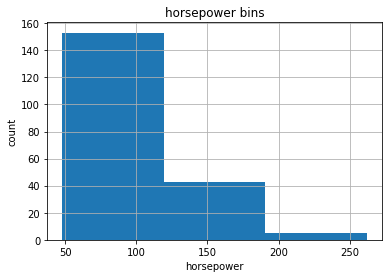

In [ ]:
import matplotlib as plt
df.horsepower.hist(bins=3)
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p> Para establecer 3 bines de ancho igual, usamos la función de numpy <code>linspace(start_value, end_value, numbers_generated)</code> .</p>
<p>En estos casos tendríamos que</p>
 <p>start_value=min(df["horsepower"]).</p>
<p>end_value=max(df["horsepower"]).</p>
<p>Como queremos crea  3 bines del mismo ancho, usamos 4 como divisor /numbers_generated=4)</p>

In [ ]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

Nombre de los grupos

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
help(pd.cut)

Aplicaciónde la función "cut"  para determinar que valor de "df['horsepower']" pertenece a qué categoría. 

In [ ]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=False )

df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Veamos las cuentas por cada bin:

In [ ]:
df["horsepower-binned"].value_counts()

Low       152
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Grafiquemos como están distribuidos por estas categorias la columna "horsepower"

Text(0.5, 1.0, 'horsepower bins')

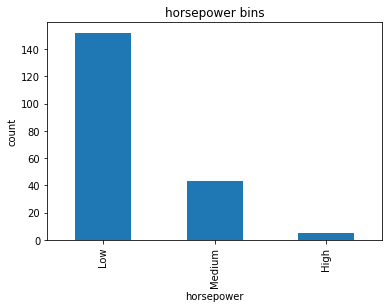

In [ ]:
import matplotlib.pyplot as plt
df["horsepower-binned"].value_counts().plot(kind='bar')
# set x/y labels and plot title

plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

## Visualización de los bins

Normalmente,  un histograma se crea para ver la distribución de los bines que creamos arriba:

In [1]:
%pwd

'/home/darkcom/Proyectos/Python/Librerias/pandas/Curso_Diplomado'

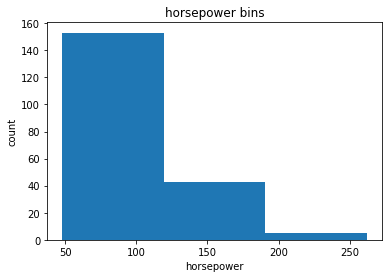

In [ ]:
import matplotlib.pyplot as plt

# draw historgram of attribute "horsepower" with bins = 3
a = plt.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()
# para guardar la imagen
#plt.savefig('hola.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
a.save('/content/drive')

AttributeError: ignored

En la gráfica anterior se muestra el resultado del bineado para el atributo "horsepower"

In [ ]:
help(plt.plot)

<p><a name="catvar"></a></p>

# 2. Manipulación de variables categóricas

[[Contenidos]](#contents)

Las variables categóricas son aquellas que contienen etiquetas en vez de valores numéricos. Exiten variables categóricas ordinales y nominales, las primeras son aquellas que tienen algún tipo de jeraquización, como por ejemplo el nivel de escolaridad:*primaria, secundaria, universitaria*; las segunas son aquellas que no se pueden ordenar como profesión: *abogado, médico, ingeniero* . Según el problema que se desea resolver y el tipo de variables categóricas, estás deben tener un tratamiento diferente.

Para ver más tipos de codificación ver: https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159

<p><a name="opevec"></a></p>

## 2.1. Operaciones vectorizadas con `strings`

[[Contenidos]](#contents)

Python ofrece una relativa facilidad en el manejo y manipulación de datos de tipo `str`. Pandas se basa en esto y proporciona un conjunto integral de operaciones vectorizadas

NumPy no proporciona un acceso tan simple. Por ejemplo, para escribir con mayúscula la primera letra de las entradas de un arreglo podemos escribir:



In [ ]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']       
[contador.capitalize() for contador in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [ ]:
# otra opción
lista = []

for contador in data:
  lista.append(contador.capitalize())

lista

['Peter', 'Paul', 'Mary', 'Guido']

Quizás esto sea suficiente para trabajar con algunos datos, pero no funcionará si faltan valores:

In [ ]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']       
[s.capitalize() for s in data]

AttributeError: ignored

Pandas incluye opciones para abordar tanto el manejo de operaciones vectorizadas como el manejo correcto de los datos faltantes a través del atributo `str` de los objetos `series` e `index` de Pandas

In [ ]:
import pandas as pd

In [ ]:
data = pd.Series(data)    
data

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [ ]:
type(data)

pandas.core.series.Series

Realicemos la operación anterior mediante el atributo `str` (note que se omiten los valores nulos)


In [ ]:
data = data.str.capitalize()

In [ ]:
data 

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

Casi todos los métodos incorporados de Python para el manejo de cadenas se reflejan en un método de vectorizado de cadenas de Pandas. Algunos de estos métodos son

*   `len()`
*   `lower()`
* `upper()`
*  `startswith()`
* `contains()`
*  `split()`
* `get()`
* `strip()`
* `replace()`



In [ ]:
monte = pd.Series([' Graham Chapman ', ' John Cleese', 'Terry Gilliam ', 'Eric Idle', 'Terry Jones', 'Michael Palin'])
monte

0     Graham Chapman 
1         John Cleese
2      Terry Gilliam 
3           Eric Idle
4         Terry Jones
5       Michael Palin
dtype: object

In [ ]:
# entradas en letra minúscula (str)
monte.str.lower()

0     graham chapman 
1         john cleese
2      terry gilliam 
3           eric idle
4         terry jones
5       michael palin
dtype: object

In [ ]:
monte

0     Graham Chapman 
1         John Cleese
2      Terry Gilliam 
3           Eric Idle
4         Terry Jones
5       Michael Palin
dtype: object

In [ ]:
# si la entrada contiene la letra T (bol)
monte.str.contains('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [ ]:
# separar por palabra (list)
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

In [ ]:
# obtener el apellido de cada entrada
monte.str.split().str.get(1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

In [ ]:
monte1=pd.DataFrame(monte)

In [ ]:
monte

0     Graham Chapman 
1         John Cleese
2      Terry Gilliam 
3           Eric Idle
4         Terry Jones
5       Michael Palin
dtype: object

In [ ]:
monte1

,0
0,Graham Chapman
1,John Cleese
2,Terry Gilliam
3,Eric Idle
4,Terry Jones
5,Michael Palin


In [ ]:
monte1['Apellido']=monte.str.split().str.get(-1)

In [ ]:
monte1[0]

0     Graham Chapman 
1         John Cleese
2      Terry Gilliam 
3           Eric Idle
4         Terry Jones
5       Michael Palin
Name: 0, dtype: object

In [ ]:
monte1[0]=monte.str.split().str.get(0)
monte1

,0,Apellido
0,Graham,Chapman
1,John,Cleese
2,Terry,Gilliam
3,Eric,Idle
4,Terry,Jones
5,Michael,Palin


Para una guia completa visitar: https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [ ]:
monte1['Nombre']= monte.str.split().str.get(0)

In [ ]:
monte1.head()

,0,Apellido,Nombre
0,Graham,Chapman,Graham
1,John,Cleese,John
2,Terry,Gilliam,Terry
3,Eric,Idle,Eric
4,Terry,Jones,Terry


<p><a name="varord"></a></p>

## 2.2. Variables ordinales: Codificación de enteros

[[Contenidos]](#contents)

La codificación entera (Integer Encoding) consiste en asignar un valor entero a cada uno de los valores ordenados, según correponda.  

In [ ]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K


In [ ]:
df[['education','education-num']].drop_duplicates?

Object `drop_duplicates` not found.


Este tipo de implementación ya está hecha en el dataset para el caso del nivel educativo en las columnas education y education-num

In [ ]:
df[['education','education-num']].drop_duplicates().sort_values(by='education-num')

,education,education-num
224,Preschool,1
160,1st-4th,2
56,5th-6th,3
15,7th-8th,4
6,9th,5
77,10th,6
3,11th,7
415,12th,8
2,HS-grad,9
10,Some-college,10


Con la función map es fácil de implementar en python. Por ejemplo para la columa class índiquemos con $1$ los $\leq 50$ y con $2$ los $>50$

In [ ]:
df['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [ ]:
df['class-num']=df['class'].map({'<=50K':1, '>50K':2})

In [ ]:
df[['class-num','class']].head(20)

,class-num,class
0,1,<=50K
1,1,<=50K
2,1,<=50K
3,1,<=50K
4,1,<=50K
5,1,<=50K
6,1,<=50K
7,2,>50K
8,2,>50K
9,2,>50K


Podemos también convertir una columna a *category* y luego utilizar esos valores categóricos para la codificación entera. Por ejemplo, realicemos este proceso para la columna *workclass*. Convirtamos la columna al tipo *category*:

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
class-num          int64
dtype: object

In [ ]:
df["workclass"] = df["workclass"].astype("category")
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education           object
education-num        int64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capitalgain          int64
capitalloss          int64
hoursperweek         int64
native-country      object
class               object
class-num            int64
dtype: object

Luego podemos asignar la variable codificada a una nueva columna utilizando `cat.codes`


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  object  
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  object  
 6   occupation      46033 non-null  object  
 7   relationship    48842 non-null  object  
 8   race            48842 non-null  object  
 9   sex             48842 non-null  object  
 10  capitalgain     48842 non-null  int64   
 11  capitalloss     48842 non-null  int64   
 12  hoursperweek    48842 non-null  int64   
 13  native-country  47985 non-null  object  
 14  class           48842 non-null  object  
 15  class-num       48842 non-null  int64   
dtypes: category(1), int64(7), object(8)
memory usage: 5.6+ MB


In [ ]:
df1= pd.DataFrame(df["workclass"].dropna())

In [ ]:
df1

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
...,...
48836,Private
48837,Private
48839,Private
48840,Private


In [ ]:
df1["workclass_code"] = df1["workclass"].cat.codes

In [ ]:
df["workclass"]

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
48837             Private
48838                 NaN
48839             Private
48840             Private
48841        Self-emp-inc
Name: workclass, Length: 48842, dtype: category
Categories (8, object): ['Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc',
                         'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [ ]:
df1["workclass_code"].unique()

array([6, 5, 3, 0, 1, 4, 7, 2], dtype=int8)

In [ ]:
df1[['workclass','workclass_code']].head(20)

,workclass,workclass_code
0,State-gov,6
1,Self-emp-not-inc,5
2,Private,3
3,Private,3
4,Private,3
5,Private,3
6,Private,3
7,Self-emp-not-inc,5
8,Private,3
9,Private,3


<p><a name="varnom"></a></p>

## 2.3. Variables nominales: Condificación one-hot (dummy variables)

[[Contenidos]](#contents)

La codificación one-hot consiste asignar valores binarios $[1, 0]$ a las variables categóricas, en las que cada valor de la variable se convierte en un campo nuevo y se asigna el valor $[1, 0]$ si el evento contiene o no la variable según sea el caso.


In [ ]:
df.sex.unique()

array(['Male', 'Female'], dtype=object)

Pandas viene con el comando `pd.get_dummies()` que facilita el trabajo y realiza la codeificación one-hot de forma muy sencilla. Note que al implementar este comando, el campo `sex` se elimina y solo quedan las variables dummy

In [ ]:
df.sex.head()

0      Male
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: object

In [ ]:
pd.get_dummies(df.sex, drop_first=True).head()

,Male
0,1
1,1
2,1
3,1
4,0


In [ ]:
help(pd.get_dummies)

Se puede implementar para el dataset completo y el comando `pd.get_dummies()` solo aplica sobre las variables categóricas.

In [ ]:
pd.get_dummies(df).head()

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,class-num,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_<=50K,class_>50K
0,2,77516,13,1,0,2,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,3,83311,13,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,215646,9,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,3,234721,7,0,0,2,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,1,338409,13,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class,class-num
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K,1
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K,1
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K,1
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K,1
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,2,United-States,<=50K,1
48838,4,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,2,United-States,<=50K,1
48839,2,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,3,United-States,<=50K,1
48840,2,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,2,0,2,United-States,<=50K,1


Aplicar este tipo de codificación puede aumentar significativamente el número de variables. Esto depende de la cantidad de posibles valores que tengan las variables categóricas

In [ ]:
len(df.columns)

16

In [ ]:
len(pd.get_dummies(df).columns)

108

<p><a name="groupby"></a></p>

# 3. Groupby

[[Contenidos]](#contents)

`Seaborn` es una libreria para hacer gráficos estadísticos en Python. Está construido sobre matplotlib y está estrechamente integrado con las estructuras de datos de pandas. Tiene incorporadas algunas bases de datos: 

https://github.com/mwaskom/seaborn-data

<p><a name="trafil"></a></p>

## 3.1. Funciones Transform y Filter

[[Contenidos]](#contents)

El dataset Planets, disponible a través del paquete Seaborn, da información sobre planetas descubiertos alrededor de otras estrellas. Se puede descargar via Seaborn de la siguiente manera. 

In [2]:
%pip install seaborn

import seaborn as sns
import numpy as np
import pandas as pd

planets = sns.load_dataset('planets')
planets.head()

     |████████████████████████████████| 294 kB 522 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load an example dataset from the online repository (requires internet).
    
    This function provides quick access to a small number of example datasets
    that are useful for documenting seaborn or generating reproducible examples
    for bug reports. It is not necessary for normal usage.
    
    Note that some of the datasets have a small amount of preprocessing applied
    to define a proper ordering for categorical variables.
    
    Use :func:`get_dataset_names` to see a list of available datasets.
    
    Parameters
    ----------
    name : str
        Name of the dataset (``{name}.csv`` on
        https://github.com/mwaskom/seaborn-data).
    cache : boolean, optional
        If True, try to load from the local cache first, and save to the cache
        if a download is required.
    data_home : string, optional
        The directory in which to cache data; se

In [ ]:
planets.groupby('mass')

Recordemos que Groupby nos ofrece las funciones `aggregate()` y `apply()`. 

`aggregate()` puede tomar una cadena, una función o una lista de estas, y calcular todos los agregados a la vez, mientras que `apply()` permite aplicar una función arbitraria a los resultados del agrupamiento

In [ ]:
planets.groupby("method")['distance'].apply(np.min)

method
Astrometry                         14.98
Eclipse Timing Variations         130.72
Imaging                             7.69
Microlensing                     1760.00
Orbital Brightness Modulation    1180.00
Pulsar Timing                    1200.00
Pulsation Timing Variations          NaN
Radial Velocity                     1.35
Transit                            38.00
Transit Timing Variations         339.00
Name: distance, dtype: float64

In [ ]:
help(planets.groupby)

In [ ]:
planets.groupby("method").distance.aggregate(["min", "max", "median"])

,min,max,median
method,,,
Astrometry,14.98,20.77,17.875
Eclipse Timing Variations,130.72,500.00,315.360
Imaging,7.69,165.00,40.395
Microlensing,1760.00,7720.00,3840.000
Orbital Brightness Modulation,1180.00,1180.00,1180.000
Pulsar Timing,1200.00,1200.00,1200.000
Pulsation Timing Variations,NaN,NaN,NaN
Radial Velocity,1.35,354.00,40.445
Transit,38.00,8500.00,341.000


Si bien `aggregate()` debe devolver una versión reducida de los datos, `transform` puede devolver una versión transformada de los datos completos para que se recombinen. Para tal transformación, la salida tiene la misma forma que la entrada

In [ ]:
df2 = planets.groupby('method').distance.transform("median").drop_duplicates()
df2.reset_index(drop=True, inplace=True)
df2

0      40.445
1      40.395
2     315.360
3     341.000
4      17.875
5     855.000
6    1180.000
7    3840.000
8    1200.000
9         NaN
Name: distance, dtype: float64

In [ ]:
type(df2)

pandas.core.series.Series

La operación `filter` permite eliminar datos en función de las propiedades del grupo. Note que esta rutina no filtra un marco de datos en su contenido. El filtro se aplica a las etiquetas del índice.

In [ ]:
# agrupemos por método y filtremos los que operan a una distancia media mayor a 500

def filter_func(x):
    return x["distance"].mean() > 500 #

planets.groupby('method').filter(filter_func).method.value_counts()

Transit                          397
Microlensing                      23
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Name: method, dtype: int64

Ejemplo: Muestre el número de planetas descubiertos por método de detección y por década

In [ ]:
decade = 10*(planets['year']//10)    # serie que contiene las decadas
decade = decade.astype(str) + 's'               
a = planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

In [ ]:
10*(2006//10)

2000

In [ ]:
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object

In [ ]:
a.unstack(level=-1)

year   method                       
1980s  Astrometry                         0.0
       Eclipse Timing Variations          0.0
       Imaging                            0.0
       Microlensing                       0.0
       Orbital Brightness Modulation      0.0
       Pulsar Timing                      0.0
       Pulsation Timing Variations        0.0
       Radial Velocity                    1.0
       Transit                            0.0
       Transit Timing Variations          0.0
1990s  Astrometry                         0.0
       Eclipse Timing Variations          0.0
       Imaging                            0.0
       Microlensing                       0.0
       Orbital Brightness Modulation      0.0
       Pulsar Timing                      9.0
       Pulsation Timing Variations        0.0
       Radial Velocity                   52.0
       Transit                            0.0
       Transit Timing Variations          0.0
2000s  Astrometry                         0

In [ ]:
type(decade)

pandas.core.series.Series

In [ ]:
10*(2006//10)

2000

<p><a name="cladiv"></a></p>

## 3.2. Especificando la clave para la división del DataFrame 

[[Contenidos]](#contents)

Los ejemplos presentados anteriormente expresan solo unas de las muchas opciones mediante las cuales se pueden definir los grupos. Veamos algunas otras opciones para la especificación de grupos

In [ ]:
# la clave puede ser cualquier serie o lista con una longitud que coincida con la del DataFrame
import numpy as np
import pandas as pd
rng = np.random.RandomState(0)        
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],'data1': range(1,7),'data2': rng.randint(0, 10, 6)}, 
                  columns = ['key', 'data1', 'data2']) 
print(df)

# agrupar las filas 0 y 2 con índice "a"; las 1 y 3 con índice 1 ; las 4 y 5 con índice 10 y obtener la suma
L = ["a",1,'a', 1, 1, 'a']    
df.groupby(L).sum()

  key  data1  data2
0   A      1      5
1   B      2      0
2   C      3      3
3   A      4      3
4   B      5      7
5   C      6      9


,data1,data2
1,11,10
a,10,17


Otro método es el de proporcionar un diccionario que asigne los valores de los índices a las claves de grupo

In [ ]:
# asignar la columna "key" como índice
df2 = df.set_index('key')   
print(df2) 

# mapear los índices
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'} 
print(df2.groupby(mapping).sum())

     data1  data2
key              
A        1      5
B        2      0
C        3      3
A        4      3
B        5      7
C        6      9
           data1  data2
consonant     16     19
vowel          5      8


In [ ]:
df2

Análogamente al mapeo, es posible pasar cualquier función de Python que ingrese el valor del índice y genere el grupo

In [ ]:
df2.groupby(str.lower).mean()

,data1,data2
a,2.5,4.0
b,3.5,3.5
c,4.5,6.0


cualquiera de las opciones anteriores se pueden combinar para agrupar con índice múltiple

In [ ]:
mi = df2.groupby([mapping, str.lower]).sum()
mi1 = df2.groupby([str.lower,mapping ]).sum()

In [ ]:
mi

data1  data2
consonant b      7      7
          c      9     12
vowel     a      5      8

In [ ]:
mi1

,,data1,data2
a,vowel,5,8
b,consonant,7,7
c,consonant,9,12


Se puede acceder a los diferentes niveles del índice múltiple mediante el argumento "level"

In [ ]:
mi.groupby(level=0).sum()

,data1,data2
consonant,16,19
vowel,5,8


In [ ]:
mi.groupby(level=1).sum()

,data1,data2
a,5,8
b,7,7
c,9,12


<p><a name="tabdin"></a></p>

## 3.3. Tablas dinámicas

[[Contenidos]](#contents)

La tabla dinámica toma los datos de las columnas como entrada y las agrupa en una tabla que proporciona un resumen multidimensional de los datos. Es esencialmente una versión multidimensional de la agregación con GroupBy.

En este caso importaremos el dataset "titanic" via seaborn, el cual contiene información sobre cada pasajero, incluyendo género, edad, clase, tarifa pagada y mucho más

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [2]:
import matplotlib.pyplot as plt


Para comenzar a aprender más sobre este dataset, podríamos comenzar por agrupar según el género, el estado de supervivencia o alguna combinación de estos. Veamos la tasa de supervivencia por género:

<Axes: xlabel='survived'>

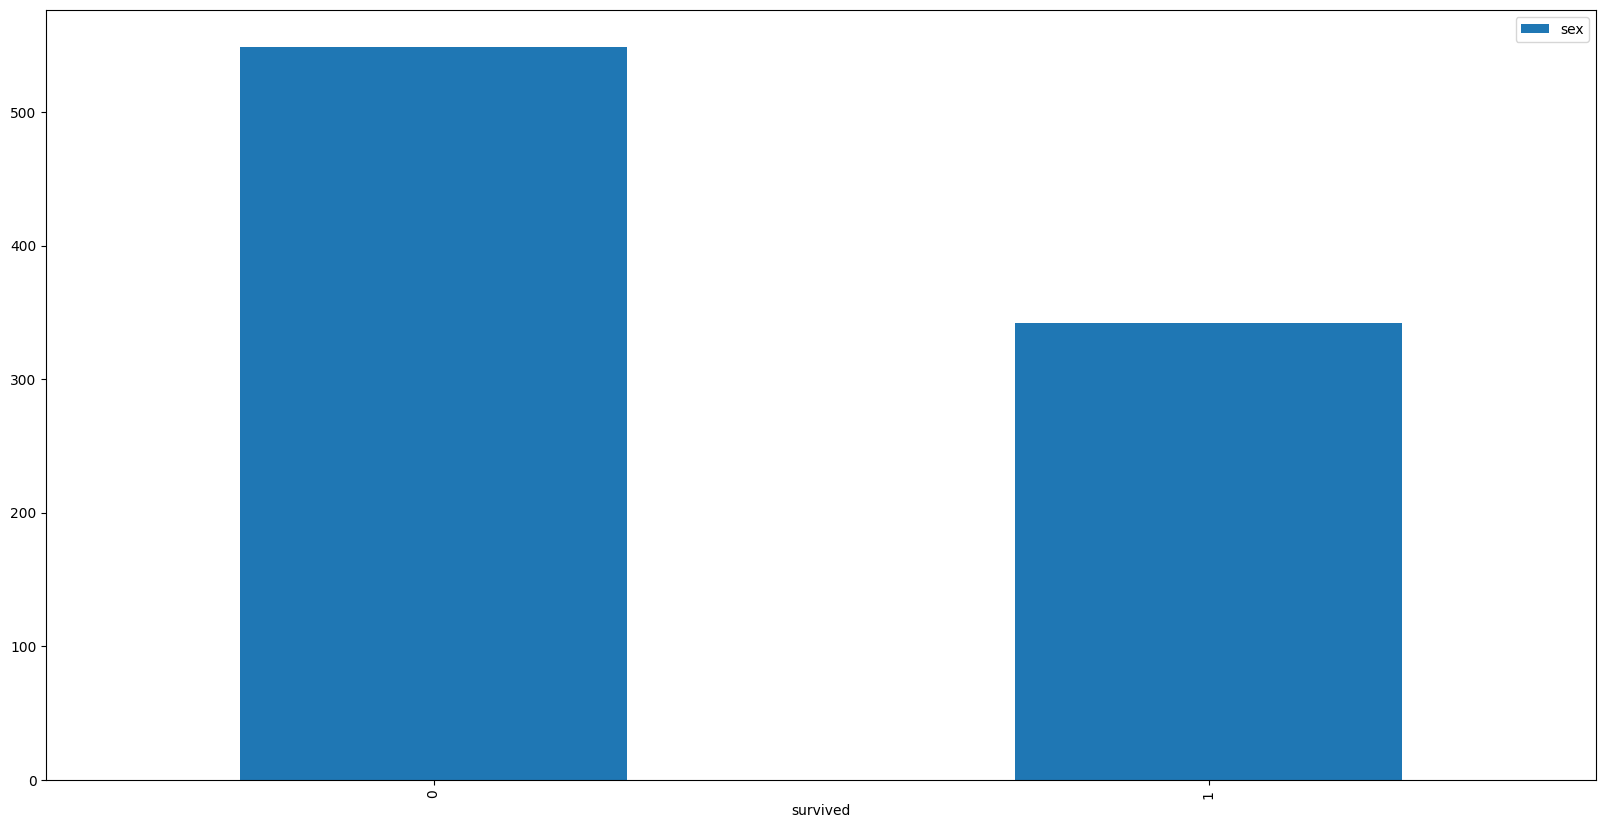

In [3]:

titanic.groupby('survived')[['sex']].count().plot(kind='bar',figsize=(20,10))


In [4]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


Nos gustaría ir un paso más allá y ver la supervivencia por sexo y, por ejemplo, clase. Con GroupBy

In [5]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [6]:
titanic.groupby(['sex', 'class'])['survived'].max()

sex     class 
female  First     1
        Second    1
        Third     1
male    First     1
        Second    1
        Third     1
Name: survived, dtype: int64

Este GroupBy bidimensional es lo suficientemente común como para que Pandas incluya una rutina conveniente pivot_table que maneja este tipo de agregación multidimensional

In [7]:
titanic.pivot_table(values='survived', index='sex')

,survived
sex,
female,0.742038
male,0.188908


In [8]:
help(titanic.pivot_table)

Por defecto `pivot_table` aplica la función `mean()`. Para cambiar la función de agregación utilizamos el argumento `aggfunc`

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#titanic.pivot_table(values="survived", index='sex', columns='class', aggfunc="sum",margins=True)

# agrupar por dos columnas y aplicar una función correspondiente a cada una

titanic.pivot_table(index='sex', columns=['class'], aggfunc={'survived':np.sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

la agrupación en tablas dinámicas se puede especificar con múltiples niveles. Podríamos estar interesados en ver la edad como una tercera dimensión. Seccionaremos la edad usando la función `pd.cut`

In [ ]:
age_intervalo = pd.cut(titanic['age'], [0, 18, 80])       
titanic.pivot_table(values='survived',index=['sex','who', age_intervalo], columns='class')

class                     First    Second     Third
sex    who   age                                   
female child (0, 18]   0.666667  1.000000  0.533333
       woman (0, 18]   1.000000  1.000000  0.461538
             (18, 80]  0.972973  0.900000  0.423729
male   child (0, 18]   1.000000  1.000000  0.321429
       man   (0, 18]   0.500000  0.000000  0.086957
             (18, 80]  0.375000  0.071429  0.133663

Podemos aplicar esta misma estrategia para trabajar con las columnas. Agreguemos información sobre la tarifa pagada usando `pd.qcut` para calcular automáticamente los cuantiles

In [ ]:
fare = pd.qcut(titanic['fare'],3)       
multi = titanic.pivot_table('survived', index=['sex', age_intervalo], columns=[fare, 'class'])
multi

fare            (-0.001, 8.662]            ... (26.0, 512.329]          
class                     First     Third  ...          Second     Third
sex    age                                 ...                          
female (0, 18]              NaN  0.700000  ...             1.0  0.111111
       (18, 80]             NaN  0.523810  ...             1.0  0.125000
male   (0, 18]              NaN  0.166667  ...             0.8  0.052632
       (18, 80]             0.0  0.127389  ...             0.0  0.500000

[4 rows x 8 columns]

In [ ]:
pd.qcut(titanic['fare'],3)

0      (-0.001, 8.662]
1      (26.0, 512.329]
2      (-0.001, 8.662]
3      (26.0, 512.329]
4      (-0.001, 8.662]
            ...       
886      (8.662, 26.0]
887    (26.0, 512.329]
888      (8.662, 26.0]
889    (26.0, 512.329]
890    (-0.001, 8.662]
Name: fare, Length: 891, dtype: category
Categories (3, interval[float64]): [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]

El resultado es una agregación de cuatro dimensiones con índices jerárquicos.

In [ ]:
multi.mean(level=0)  

fare   (-0.001, 14.454]           ... (14.454, 512.329]          
class             First   Second  ...            Second     Third
sex                               ...                            
female              NaN  0.94000  ...          0.957143  0.354743
male                0.0  0.04902  ...          0.424242  0.185440

[2 rows x 6 columns]

con la palabra clave `axis` podemos acceder a los niveles en las columnas

In [ ]:
multi.mean(axis=1,level="class")

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.516234
       (18, 80]  0.972973  0.897143  0.417874
male   (0, 18]   0.800000  0.409091  0.219720
       (18, 80]  0.195652  0.064171  0.158654

A veces es útil calcular totales a lo largo de cada grupo. Esto se puede hacer a través de la palabra clave de `margin`

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [ ]:
help(titanic.pivot_table)

## Taller

A continuación cargaremos dos bases de datos con información referente a tarjetas de credito del mes 09 del 2017.

El archivo ESTADO_201709.txt tal que:

* ID:​ Nro. de identificación.
* Franquicia:​ A, B, C.
* Tipo Tarjeta:​ Representa el tipo de tarjeta.
* Número Tarjeta:​ Indica el número de la TC.
* Cupo Global:​ Indica el cupo de crédito que tiene la tarjeta.
* Disponible: Indica del cupo global cuanto tiene a ese corte disponible para realizar compras o avances.
* Fecha Emisión:​ Fecha en la que se compró la tarjeta.
* Fecha Ult Aumento Cupo: Fecha en la que se realizó el último aumento de cupo. Cuando está en 0 significa que nunca se ha realizado un aumento de cupo.
* Total Mes en Mora: Número de meses que ha estado en mora la TC (durante toda
la vida de la tarjeta).
*Altura de Mora: ​Indica la mora actual que tiene la TC. Viene en rango:
  ○ 0 No está en mora,
  ○ 30 está en mora hace menos de 30 días,
  ○ 60 está en mora hace menos de 60 días.
  ○ 90 está en mora hace menos de 90 días.
*Código Vendedor:​ Indica el código del vendedor que emitió la TC.
*Código Estado Tarjeta: Indica si la tarjeta está Activa o vigente (Codigo=0) y código = 1 (indica que la tarjeta está cancelada por el cliente).

Y el archivo TRANSACCION_201709.txt, tal que:

* ID:​ Nro de identificación.
* Número Tarjeta:​ Indica el número de la TC que realizó la transacción.
* Fecha de transacción​: Indica la fecha en que se realizó la transacción.
* Codigo Transacción:
  ○ AV : AVANCE
  ○ AB: ABONO
  ○ CN: COMPRA NACIONAL
  ○ CI: COMPRA INTERNAL
  ○ CM: CUOTA DE MANEJO.
* Valor Transacción:​ Indica el valor de la transacción.
* Numero Cuotas Diferidas: Indica el número de cuotas en el que el cliente desea pagar la compra.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

path = 'https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/'
dfE = pd.read_csv(path+'ESTADO_201709.txt', delimiter="|")
dfT = pd.read_csv(path+'TRANSACCION_201709.txt', delimiter="|")

In [ ]:
dfE.tail()

,ID,FRANQUICIA,TIPO TARJETA,NUMERO TARJETA,CUPO GLOBAL,DISPONIBLE,FECHA DE EMISION,FECHA ULT AUMENTO CUPO,TOTAL MES EN MORA,ALTURA DE MORA,CODIGO VENDEDOR,CODIGO ESTADO TARJETA
9201,6020,C,C PLATINUM,9081,17250000.0,2807607.11,20111020,20170605,0,0,10569,0
9202,6420,C,C PLATINUM,9152,15000000.0,12984899.86,20140926,0,0,0,31068,0
9203,6842,C,C PLATINUM,9051,10000000.0,9918650.37,20170618,0,0,0,10998,0
9204,5495,C,C PLATINUM,9123,42000000.0,42000000.00,19930901,0,1,0,0,0
9205,3980,C,C PLATINUM,9159,10000000.0,10000000.00,20170623,0,0,0,1165,0


In [ ]:
dfT.tail()

,ID,NUMERO TARJETA,FECHA DE TRANSACCION,CODIGO TRANSACCION,VALOR TRANSACCION,NUMERO CUOTAS DIFERIDAS
25438,9181,7343,20170921,CN,13000.0,1
25439,9181,7343,20170921,CN,27800.0,1
25440,9181,7343,20170921,CN,89900.0,1
25441,9181,7343,20170921,CN,219600.0,1
25442,9181,7343,20170928,CN,29000.0,1


### Responda
1. Imprima cada uno de los datasets para ver sus columnas
2. Use el método merge para combinar los datasets  en el `NUMERO TARJETA' y haciendo la intersección.
3. Busque los datos faltantes y determine una estrategia adecuada par su llenado.
4. Convierta todas las fechas al fomato adecuado
5. Genere un histograma de cada columna para ver su distribución
6. Agrupe los datos por tipo de tarjeta y estado de la tarjeta. Hága un conteo ¿Existe alguna relación entre el tipo de tarjeta y la cancelación de la misma?
7. Realice un bineo del total de meses en mora partiendolos en  tres categorías: 'baja mora','media mora','alta mora'. ¿Existe alguna relación entre la mora y la cancelación de la tarjeta?.
8. Haga un gráfico de dispersión 'CODIGO VENDEDOR' vs 'CODIGO ESTADO TARJETA', ¿El vendedor de la tarjeta influencia las cancelaciones?.

Recuerde hacer un analisis exploratorio de sus datos para familiarizarse con los datos antes de comenzar el análisis.

Para ver la solución haga double-click aquí. 
<!--

#1 imprimir los datasets:
dfE.head()
dfT.head()

#2 Merge:
df = pd.merge(dfE,dfT, on='NUMERO TARJETA', how='inner')
df.head()

#3 Tratamiento de datos faltantes:
df.isna().sum()
#dada la forma como están organizados los datos en la columna 'TIPO TARJETA', lo más lógico es llenarlo con ffill
df['TIPO TARJETA'].fillna(method='ffill',inplace=True)

# al solo haber 4 entradas sin codigo de transacción podemos eliminarlas sin afectar la estadística
df.dropna(subset=['CODIGO TRANSACCION'],inplace=True)

#llenaremos el cupo con la media ya que es una variable continua
df['CUPO GLOBAL'].fillna((df['CUPO GLOBAL'].mean()),inplace=True)
df.isna().sum()

#4 conversión de fechas:
df['FECHA DE EMISION'] = pd.to_datetime(df['FECHA DE EMISION'].astype(str),format='%Y%m%d')
df['FECHA DE TRANSACCION'] = pd.to_datetime(df['FECHA DE TRANSACCION'].astype(str),format='%Y%m%d')

#para la fecha de último aumento de cupo debemos tener cuidado con los datos marcados en 0
fechas_aumento = []
for x in df['FECHA ULT AUMENTO CUPO']:
    if x != 0:
        fechas_aumento.append(pd.to_datetime(str(x),format='%Y%m%d'))
    else:
        fechas_aumento.append(0)
df['FECHA ULT AUMENTO CUPO'] = fechas_aumento


#5 Histograma de las columbas:
df.hist(figsize=(10,10))

#6 
df.groupby(['TIPO TARJETA','CODIGO ESTADO TARJETA']).agg({'CODIGO ESTADO TARJETA':['count']})

#7
df['MES MORA DISCR'] = pd.cut(df['TOTAL MES EN MORA'],bins=3,labels=['baja mora','media mora','alta mora'])
df.groupby(['MES MORA DISCR','CODIGO ESTADO TARJETA']).agg({'CODIGO ESTADO TARJETA':['count']})


#8
df.plot(x='CODIGO VENDEDOR',y='CODIGO ESTADO TARJETA',kind='scatter')

#tenemos un dato atípico, aplicamos un filtro para eliminarlo

df['CODIGO VENDEDOR']=df[df['CODIGO VENDEDOR']<10000]['CODIGO VENDEDOR']
df.plot(x='CODIGO VENDEDOR',y='CODIGO ESTADO TARJETA',kind='scatter')


-->